In [70]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [31]:
data=pd.read_excel("WC2019.xlsx")

In [32]:
data

Team  Score  Overs    RR  Inns      Opposition       Ground  \
0        England  386/6   50.0  7.72     1    v Bangladesh      Cardiff   
1          India  352/5   50.0  7.04     1     v Australia     The Oval   
2       Pakistan  348/8   50.0  6.96     1       v England   Nottingham   
3        England  334/9   50.0  6.68     2      v Pakistan   Nottingham   
4     Bangladesh  330/6   50.0  6.60     1  v South Africa     The Oval   
5      Australia    316   50.0  6.32     2         v India     The Oval   
6        England  311/8   50.0  6.22     1  v South Africa     The Oval   
7   South Africa  309/8   50.0  6.18     2    v Bangladesh     The Oval   
8      Australia    288   49.0  5.87     1   v West Indies   Nottingham   
9     Bangladesh    280   48.5  5.73     2       v England      Cardiff   
10   West Indies  273/9   50.0  5.46     2     v Australia   Nottingham   
11   New Zealand  248/8   47.1  5.25     2    v Bangladesh     The Oval   
12    Bangladesh    244   49.2  4.94     1   v New Zealand     The Oval   
13         India  230/4   47.3  4.84     2  v South Africa  Southampton   
14  South Africa  227/9   50.0  4.54     1         v India  Southampton   
15     Australia  209/3   34.5  6.00     2   v Afghanistan      Bristol   
16   Afghanistan    207   38.2  5.40     1     v Australia      Bristol   
17  South Africa    207   39.5  5.19     2       v England     The Oval   
18     Sri Lanka    201   36.5  5.45     1   v Afghanistan      Cardiff   
19   New Zealand  173/3   32.1  5.37     2   v Afghanistan      Taunton   
20   Afghanistan    172   41.1  4.17     1   v New Zealand      Taunton   
21   Afghanistan    152   32.4  4.65     2     v Sri Lanka      Cardiff   
22   New Zealand  137/0   16.1  8.47     2     v Sri Lanka      Cardiff   
23     Sri Lanka    136   29.2  4.63     1   v New Zealand      Cardiff   
24   West Indies  108/3   13.4  7.90     2      v Pakistan   Nottingham   
25      Pakistan    105   21.4  4.84     1   v West Indies   Nottingham   
26  South Africa   29/2    7.3  3.86     1   v West Indies  Southampton   

   Match Date   Scorecard  
0  2019-06-08  ODI # 4153  
1  2019-06-09  ODI # 4155  
2  2019-06-03  ODI # 4148  
3  2019-06-03  ODI # 4148  
4  2019-06-02  ODI # 4147  
5  2019-06-09  ODI # 4155  
6  2019-05-30  ODI # 4143  
7  2019-06-02  ODI # 4147  
8  2019-06-06  ODI # 4152  
9  2019-06-08  ODI # 4153  
10 2019-06-06  ODI # 4152  
11 2019-06-05  ODI # 4151  
12 2019-06-05  ODI # 4151  
13 2019-06-05  ODI # 4150  
14 2019-06-05  ODI # 4150  
15 2019-06-01  ODI # 4146  
16 2019-06-01  ODI # 4146  
17 2019-05-30  ODI # 4143  
18 2019-06-04  ODI # 4149  
19 2019-06-08  ODI # 4154  
20 2019-06-08  ODI # 4154  
21 2019-06-04  ODI # 4149  
22 2019-06-01  ODI # 4145  
23 2019-06-01  ODI # 4145  
24 2019-05-31  ODI # 4144  
25 2019-05-31  ODI # 4144  
26 2019-06-10  ODI # 4156

# histogram
- frequency and consistency
# Boxplot
- outliers,central tendecie

In [33]:
data.dtypes

Team                  object
Score                 object
Overs                float64
RR                   float64
Inns                   int64
Opposition            object
Ground                object
Match Date    datetime64[ns]
Scorecard             object
dtype: object

In [85]:
score=[]
wickets=[]
data["Score"]
for i in data["Score"]:
    if type(i)==str:
        score.append(int(i.split("/")[0]))
        wickets.append(int(i.split("/")[1]))
    else:
        score.append(int(i))
        wickets.append(0)

In [86]:
data["New Score"]=score

In [87]:
data["Wickets"]=wickets

In [88]:
data.describe()

Overs         RR       Inns   New Score    Wickets
count  27.000000  27.000000  27.000000   27.000000  27.000000
mean   40.103704   5.788148   1.481481  233.777778   3.370370
std    12.889068   1.155256   0.509175   88.892041   3.596453
min     7.300000   3.860000   1.000000   29.000000   0.000000
25%    33.450000   4.890000   1.000000  172.500000   0.000000
50%    47.300000   5.460000   1.000000  230.000000   3.000000
75%    50.000000   6.460000   2.000000  310.000000   7.000000
max    50.000000   8.470000   2.000000  386.000000   9.000000

In [89]:
data

Team  Score  Overs    RR  Inns      Opposition       Ground  \
0        England  386/6   50.0  7.72     1    v Bangladesh      Cardiff   
1          India  352/5   50.0  7.04     1     v Australia     The Oval   
2       Pakistan  348/8   50.0  6.96     1       v England   Nottingham   
3        England  334/9   50.0  6.68     2      v Pakistan   Nottingham   
4     Bangladesh  330/6   50.0  6.60     1  v South Africa     The Oval   
5      Australia    316   50.0  6.32     2         v India     The Oval   
6        England  311/8   50.0  6.22     1  v South Africa     The Oval   
7   South Africa  309/8   50.0  6.18     2    v Bangladesh     The Oval   
8      Australia    288   49.0  5.87     1   v West Indies   Nottingham   
9     Bangladesh    280   48.5  5.73     2       v England      Cardiff   
10   West Indies  273/9   50.0  5.46     2     v Australia   Nottingham   
11   New Zealand  248/8   47.1  5.25     2    v Bangladesh     The Oval   
12    Bangladesh    244   49.2  4.94     1   v New Zealand     The Oval   
13         India  230/4   47.3  4.84     2  v South Africa  Southampton   
14  South Africa  227/9   50.0  4.54     1         v India  Southampton   
15     Australia  209/3   34.5  6.00     2   v Afghanistan      Bristol   
16   Afghanistan    207   38.2  5.40     1     v Australia      Bristol   
17  South Africa    207   39.5  5.19     2       v England     The Oval   
18     Sri Lanka    201   36.5  5.45     1   v Afghanistan      Cardiff   
19   New Zealand  173/3   32.1  5.37     2   v Afghanistan      Taunton   
20   Afghanistan    172   41.1  4.17     1   v New Zealand      Taunton   
21   Afghanistan    152   32.4  4.65     2     v Sri Lanka      Cardiff   
22   New Zealand  137/0   16.1  8.47     2     v Sri Lanka      Cardiff   
23     Sri Lanka    136   29.2  4.63     1   v New Zealand      Cardiff   
24   West Indies  108/3   13.4  7.90     2      v Pakistan   Nottingham   
25      Pakistan    105   21.4  4.84     1   v West Indies   Nottingham   
26  South Africa   29/2    7.3  3.86     1   v West Indies  Southampton   

   Match Date   Scorecard  New Score  Wickets  
0  2019-06-08  ODI # 4153        386        6  
1  2019-06-09  ODI # 4155        352        5  
2  2019-06-03  ODI # 4148        348        8  
3  2019-06-03  ODI # 4148        334        9  
4  2019-06-02  ODI # 4147        330        6  
5  2019-06-09  ODI # 4155        316        0  
6  2019-05-30  ODI # 4143        311        8  
7  2019-06-02  ODI # 4147        309        8  
8  2019-06-06  ODI # 4152        288        0  
9  2019-06-08  ODI # 4153        280        0  
10 2019-06-06  ODI # 4152        273        9  
11 2019-06-05  ODI # 4151        248        8  
12 2019-06-05  ODI # 4151        244        0  
13 2019-06-05  ODI # 4150        230        4  
14 2019-06-05  ODI # 4150        227        9  
15 2019-06-01  ODI # 4146        209        3  
16 2019-06-01  ODI # 4146        207        0  
17 2019-05-30  ODI # 4143        207        0  
18 2019-06-04  ODI # 4149        201        0  
19 2019-06-08  ODI # 4154        173        3  
20 2019-06-08  ODI # 4154        172        0  
21 2019-06-04  ODI # 4149        152        0  
22 2019-06-01  ODI # 4145        137        0  
23 2019-06-01  ODI # 4145        136        0  
24 2019-05-31  ODI # 4144        108        3  
25 2019-05-31  ODI # 4144        105        0  
26 2019-06-10  ODI # 4156         29        2

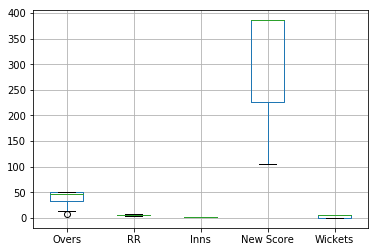

In [39]:
data.boxplot()

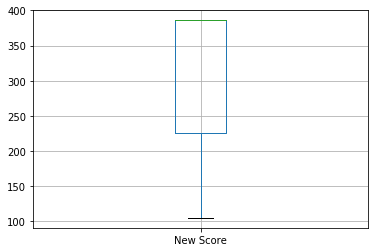

In [40]:
data.boxplot(column="New Score")

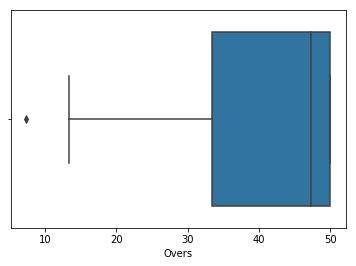

In [90]:
sns.boxplot(data["Overs"])

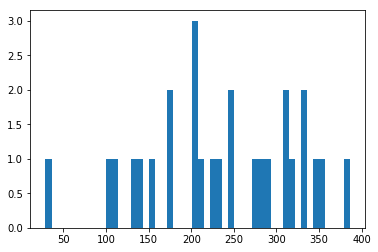

In [91]:
plt.hist(data["New Score"],bins=50)
plt.show()

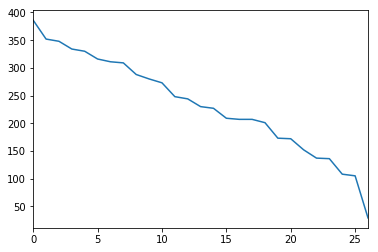

In [92]:
data["New Score"].plot()

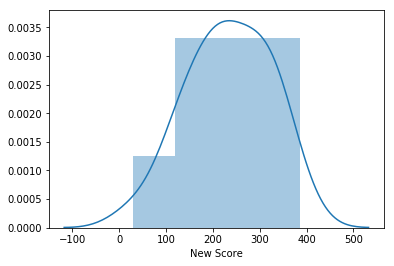

In [93]:
sns.distplot(data["New Score"])

# Kurtosis
- f

In [94]:
list1=[1,2,2,3,3,3,4,4,4,4,5,5,5,6,6,7]

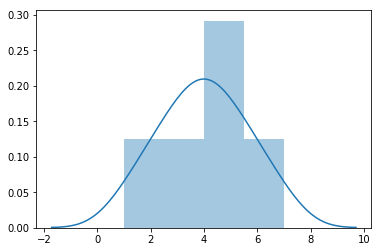

In [95]:
sns.distplot(list1)

(0, 0.22)

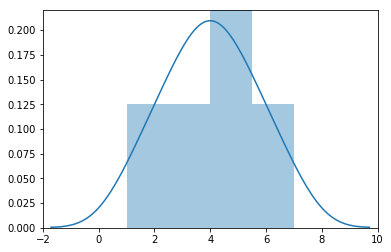

In [96]:
sns.distplot(list1)
plt.xlim(-2,10)
plt.ylim(0,0.22)

# Covariance


In [97]:
data.cov()

Overs         RR      Inns    New Score     Wickets
Overs       166.128063   0.930546 -0.401852  1026.270085   21.967806
RR            0.930546   1.334616  0.107464    45.780342    1.011097
Inns         -0.401852   0.107464  0.259259    -2.427350    0.122507
New Score  1026.270085  45.780342 -2.427350  7901.794872  171.700855
Wickets      21.967806   1.011097  0.122507   171.700855   12.934473

In [98]:
data.corr()

Overs        RR      Inns  New Score   Wickets
Overs      1.000000  0.062494 -0.061232   0.895730  0.473904
RR         0.062494  1.000000  0.182692   0.445798  0.243355
Inns      -0.061232  0.182692  1.000000  -0.053629  0.066899
New Score  0.895730  0.445798 -0.053629   1.000000  0.537075
Wickets    0.473904  0.243355  0.066899   0.537075  1.000000

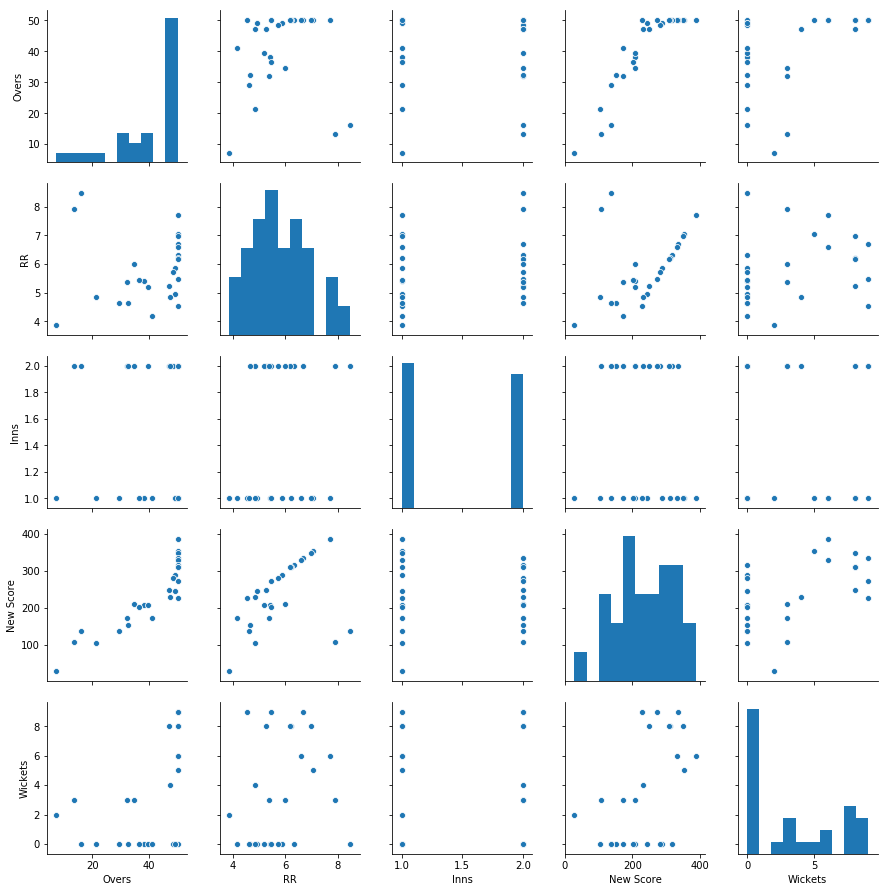

In [99]:
sns.pairplot(data)

# Finding zScore using scipy

In [100]:
from scipy.stats import norm

In [101]:
norm.ppf(0.975)

1.959963984540054

In [102]:
norm.ppf(0.995)

2.5758293035489004

In [103]:
norm.ppf(0.95)

1.6448536269514722

In [104]:
import math


# margin of error is the ammount of added pr sub to point of estimate from confidence interval

In [105]:
data.keys()
con_coef=0.95
alpha=1-con_coef

In [106]:
meand=data["New Score"].mean()
meand

233.77777777777777

In [107]:
stdd=data["New Score"].std()

In [108]:
std_error=std/math.sqrt(len(data["New Score"]))

In [109]:
zcritcal =norm.ppf(0.95)
zcritcal

1.6448536269514722

In [110]:
Z_interval=stats.norm.interval(alpha=con_coef)
Z_interval

(-1.959963984540054, 1.959963984540054)

In [111]:
CI_lower=meand-zcritcal*std_error
CI_upper=meand+zcritcal*std_error

In [112]:
CI_lower,CI_upper

(202.91667245221223, 264.6388831033433)